In [43]:
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('C:\\Users\\dell\\OneDrive\\Documents\\trainingdataset\\train_dogsnondogs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # train set labels

    test_dataset = h5py.File('C:\\Users\\dell\\OneDrive\\Documents\\testdataset\\test_dogsnondogs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # test set labels

    classes = np.unique(train_set_y_orig)  # the list of unique classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes



In [44]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
     

In [45]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print(train_set_y.shape)


(1, 150)


y = [1], it's a '1' picture.


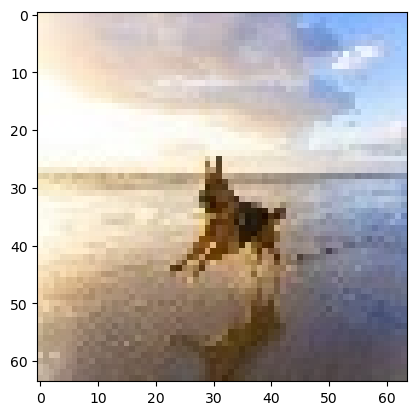

In [47]:
# Example of a picture
index = 123
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + str(classes[np.squeeze(train_set_y[:, index])]) + "' picture.")

In [48]:
# importing required packages

import numpy as np
import h5py
import matplotlib.pyplot as plt
import h5py
import numpy as np

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    cache = Z 
    
    return A, cache


def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters 

def initialize_parameters_deep(layer_dims):

    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters        
def linear_forward(A, W, b):
    
    Z = np.dot(W, A) + b
    cache = (A, W, b) 
    
    return Z, cache
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    cache = (linear_cache, activation_cache)

    return A, cache
def compute_cost(AL, Y):
    
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)  
    
    return cost

def relu_backward(dA, cache):

    Z = cache
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    
    return dZ

def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

# linear_backward
def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

# linear_activation_backward
def linear_activation_backward(dA, cache, activation):
 
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    # Shorten the code
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

# update_parameters
def update_parameters(parameters, grads, learning_rate):
   
    L = len(parameters)
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

# Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  #
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
            
    return AL, caches

def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) 
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print accuracy
    p = p.astype(int)
    y = y.astype(int)

    # perform elementwise comparison
    accuracy = np.sum(p == y) / m * 100

    # print accuracy
    print("Accuracy: " + str(accuracy) + " %")
        
    return p

In [49]:

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [87]:

n_x = 12288     # num_px * num_px * 3
n_h = 4
n_y = 1
layers_dims = (n_x, n_h, n_y)

def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
            
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        # Set grads['dW1'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6930984395644667
Cost after iteration 100: 0.6917311254424247
Cost after iteration 200: 0.6862260268119219
Cost after iteration 300: 0.6746329011975214
Cost after iteration 400: 0.6509738279371214
Cost after iteration 500: 0.6098613443741605
Cost after iteration 600: 0.5259329662446275
Cost after iteration 700: 0.5775940880330174
Cost after iteration 800: 0.4786527604743455
Cost after iteration 900: 0.44449977728298273
Cost after iteration 1000: 0.41005451681911786
Cost after iteration 1100: 0.3768842225548046
Cost after iteration 1200: 0.3475632999984632
Cost after iteration 1300: 0.3108256053011224
Cost after iteration 1400: 0.2740236893152646
Cost after iteration 1500: 0.24276743058966305
Cost after iteration 1600: 0.11981431786789197
Cost after iteration 1700: 0.08861716474975304
Cost after iteration 1800: 0.06693689501881754
Cost after iteration 1900: 0.05288925786203386
Cost after iteration 2000: 0.043047713542276836
Cost after iteration 2100: 0.03585552

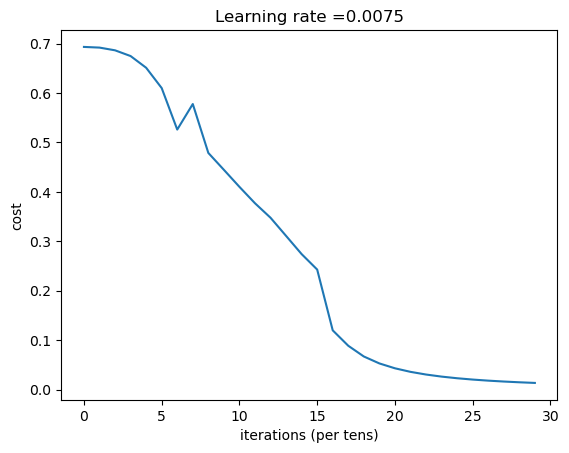

In [88]:
# calling the two-layer network for our dataset
parameters = two_layer_model(train_set_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 3000, print_cost=True)

In [89]:
# Calculating the accuracy of the model on both training and testing data

print("Training Dataset")
pred_train = predict(train_set_x, train_set_y, parameters)

print("Testing Dataset")
predictions_test = predict(test_set_x, test_set_y, parameters)

Training Dataset
Accuracy: 100.0 %
Testing Dataset
Accuracy: 63.46153846153846 %


y = 1, you predicted that it is a "Dog" picture.


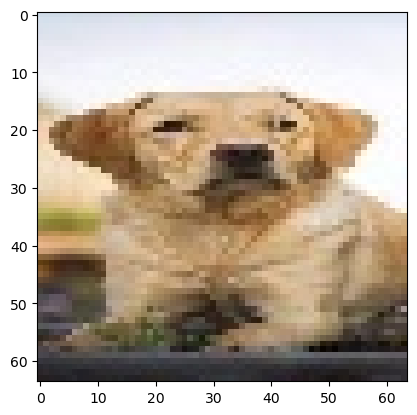

In [90]:
index = 27  
plt.imshow(test_set_x[:,index].reshape((64, 64, 3)))
pred_label = int(predictions_test[0,index])
pred_class = "Dog"
if pred_label == 0:
    pred_class = "non-Dog"
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + pred_class +  "\" picture.")

In [91]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model (with one additional input layer)

# n_layer_model
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=1000, print_cost=False): #lr was 0.009

    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.694609
Cost after iteration 100: 0.613848
Cost after iteration 200: 0.644829
Cost after iteration 300: 0.568733
Cost after iteration 400: 0.467837
Cost after iteration 500: 0.293042
Cost after iteration 600: 0.333797
Cost after iteration 700: 0.164429
Cost after iteration 800: 0.112619
Cost after iteration 900: 0.047786
Cost after iteration 1000: 0.040305
Cost after iteration 1100: 0.024085
Cost after iteration 1200: 0.016613
Cost after iteration 1300: 0.012240
Cost after iteration 1400: 0.009512


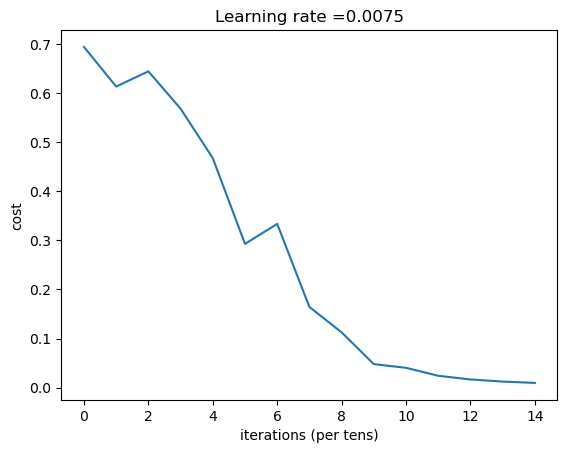

In [96]:
# calling this deep neural network
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations=1500, print_cost=True)

In [97]:
# calculating accuracy of training and testing data for this deep network model
print("Training Dataset")
pred_train = predict(train_set_x, train_set_y, parameters)

print("Testing Dataset")
predictions_test = predict(test_set_x, test_set_y, parameters)

Training Dataset
Accuracy: 100.0 %
Testing Dataset
Accuracy: 65.38461538461539 %


y = 1, you predicted that it is a "Dog" picture.


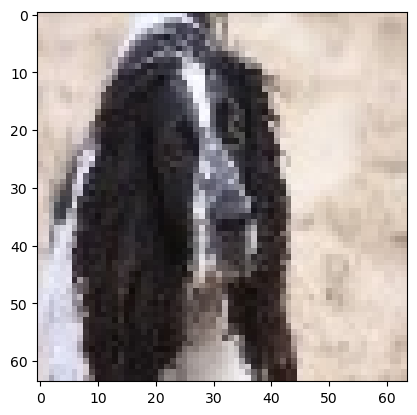

In [83]:
# testing the results of our model on a particular example

index = 28  
plt.imshow(test_set_x[:,index].reshape((64, 64, 3)))
pred_label = int(predictions_test[0,index])
pred_class = "Dog"
if pred_label == 0:
    pred_class = "non-Dog"
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + pred_class +  "\" picture.")

In [98]:
#we use the network with 2 layers and the accuracy is 63% while when we use the
#network with 4 layers the accuracy increases to 65%Deep neural networks can achieve high accuracy but may overfit.
#The network with 4 layers achieved higher accuracy but showed signs of overfitting.
#Regularization techniques can prevent overfitting.
#The learning rate, number of iterations, and number of neurons in each layer are hyperparameters that affect accuracy.